In [ ]:
import pandas as pd
file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)
print(df.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

In [ ]:
print(df.isnull().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

box plot before removal of outliers

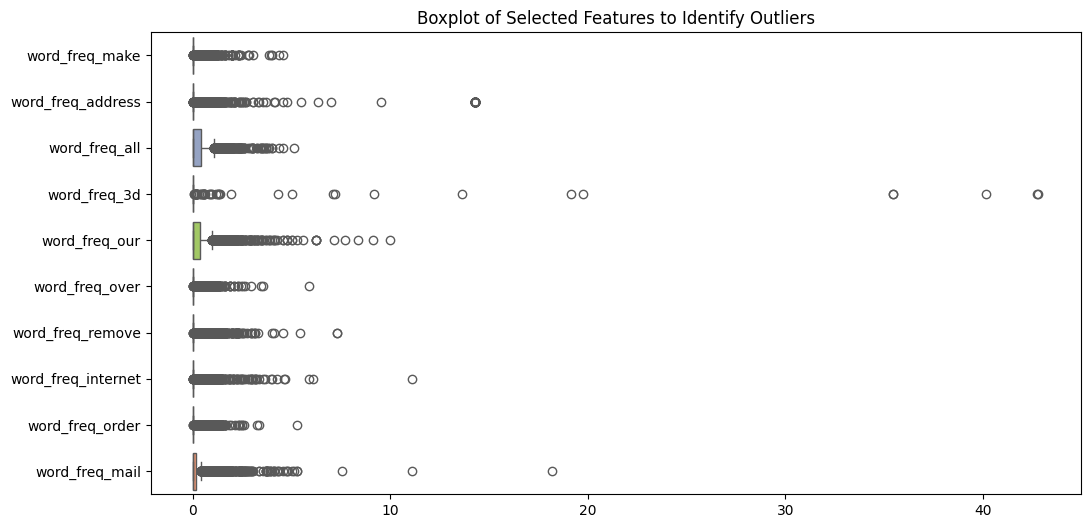

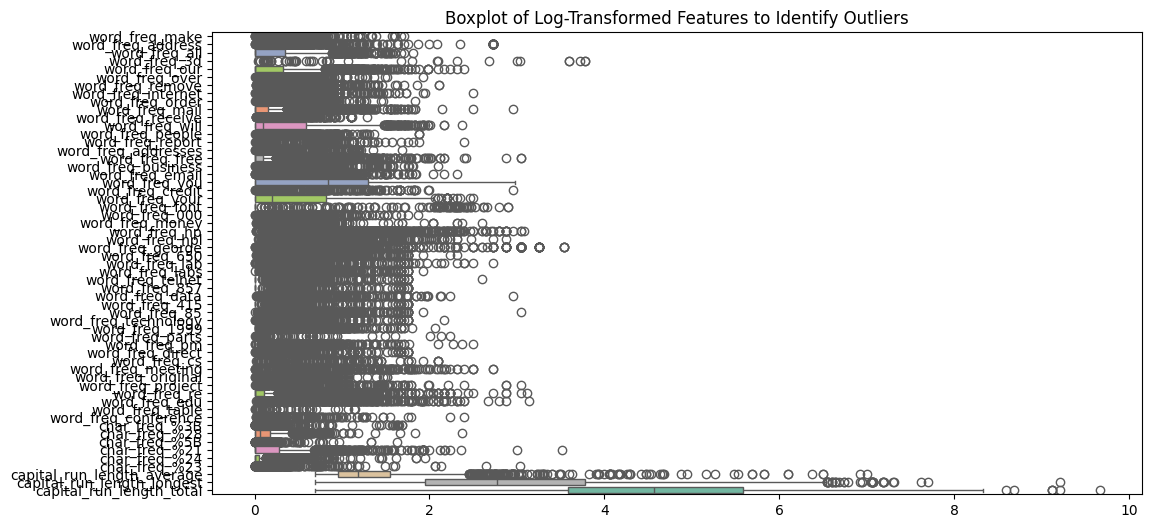

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)
numeric_cols = df.drop(columns=['class'])
subset_cols = numeric_cols.columns[:10]  # First 10 columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols[subset_cols], orient="h", palette="Set2")
plt.title("Boxplot of Selected Features to Identify Outliers")
plt.show()
numeric_cols_log = np.log1p(numeric_cols)
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols_log, orient="h", palette="Set2")
plt.title("Boxplot of Log-Transformed Features to Identify Outliers")
plt.show()


removing outliers

In [ ]:
import numpy as np
import pandas as pd
file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]
df_cleaned = remove_outliers_iqr(df.drop(columns=['class']))  # Excluding 'class' column
df_cleaned['class'] = df['class']  # Re-add target variable
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

Shape before removing outliers: (4601, 58)
Shape after removing outliers: (177, 58)


Boxplot After Removing Outliers

<ipython-input-8-f5f9a8631f37>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[[3.4657359 ]
 [1.38629436]
 [1.38629436]
 [2.48490665]
 [1.60943791]
 [1.60943791]
 [2.30258509]
 [2.48490665]
 [2.83321334]
 [3.29583687]
 [3.29583687]
 [0.69314718]
 [0.69314718]
 [1.38629436]
 [0.69314718]
 [2.77258872]
 [3.4657359 ]
 [2.30258509]
 [1.60943791]
 [3.52636052]
 [3.52636052]
 [0.69314718]
 [0.69314718]
 [2.07944154]
 [1.38629436]
 [1.38629436]
 [1.79175947]
 [1.38629436]
 [1.38629436]
 [1.60943791]
 [1.38629436]
 [0.69314718]
 [1.94591015]
 [1.60943791]
 [2.30258509]
 [1.38629436]
 [1.38629436]
 [1.09861229]
 [0.69314718]
 [1.79175947]
 [1.38629436]
 [0.69314718]
 [0.69314718]
 [0.69314718]
 [1.60943791]
 [0.69314718]
 [2.07944154]
 [1.38629436]
 [3.17805383]
 [1.60943791]
 [1.94591015]
 [2.63905733]
 [1.60943791]
 [1.38629436]
 [1.38629436]
 [0.69314718]
 [1.60943791]
 [1.60943791]
 [1.09861229]
 [2.197224

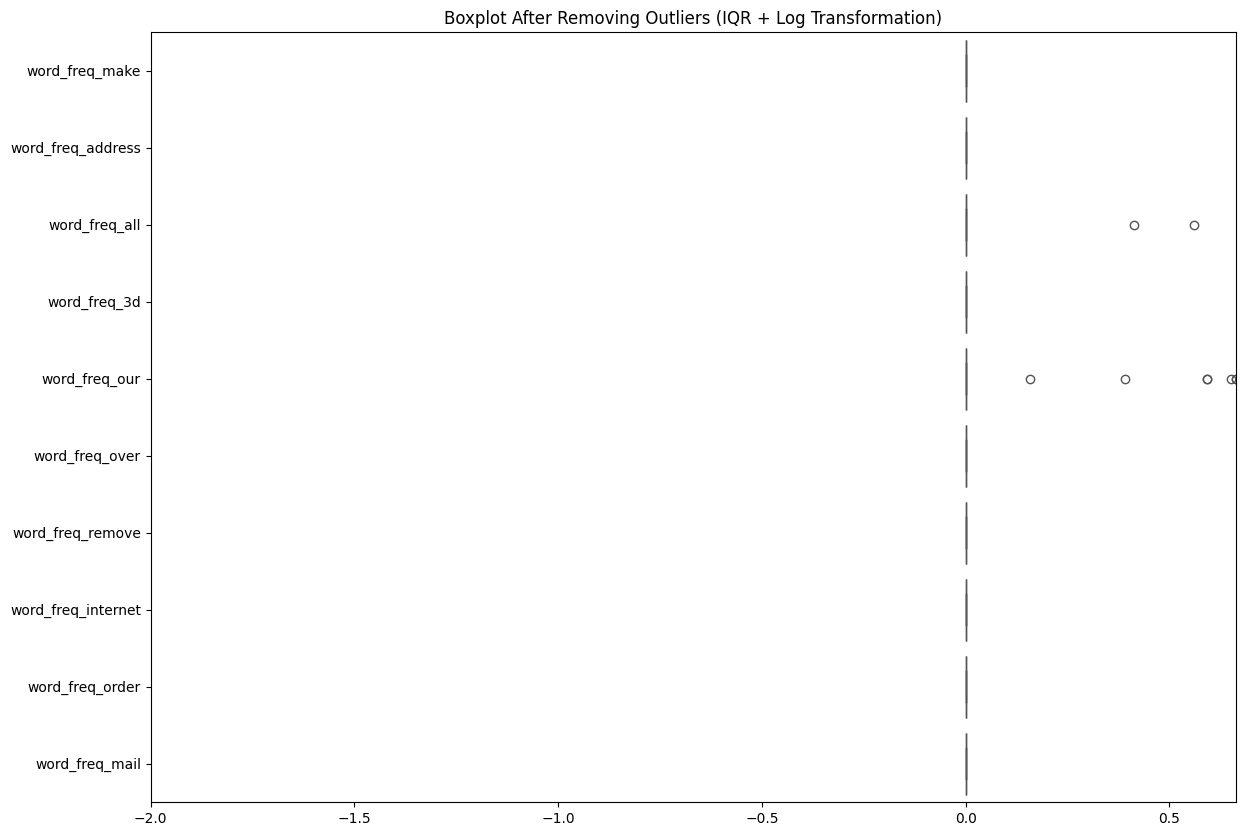

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]
df_cleaned = remove_outliers_iqr(df.drop(columns=['class']))
df_cleaned['class'] = df['class']
df_log_transformed = df_cleaned.copy()
df_log_transformed[df_log_transformed > 0] = np.log1p(df_log_transformed[df_log_transformed > 0])
subset_cols = df_log_transformed.columns[:10]
plt.figure(figsize=(14, 10))
sns.boxplot(data=df_log_transformed[subset_cols], orient="h", palette="coolwarm")
plt.xlim([-2, df_log_transformed[subset_cols].max().max()])
plt.title("Boxplot After Removing Outliers (IQR + Log Transformation)")
plt.show()


Correlation Heatmap

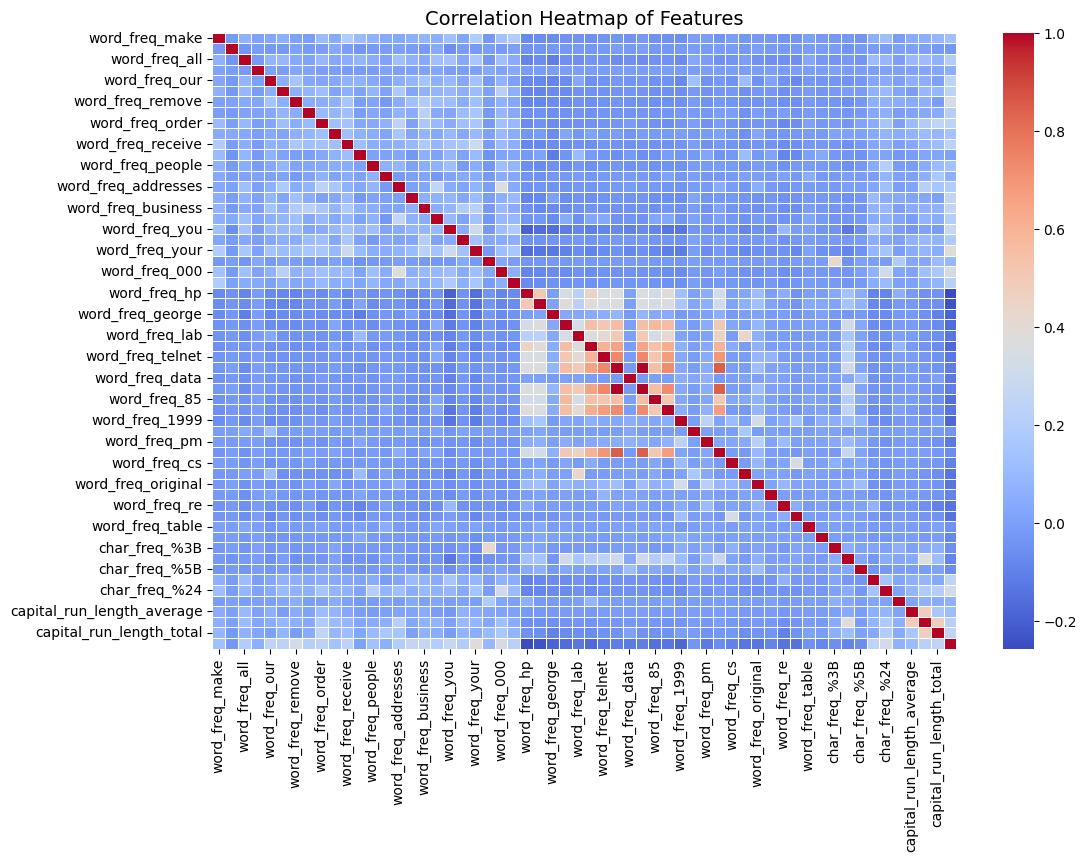

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

time series

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.sort_values(by='timestamp')
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df['timestamp'], y=df['word_freq_make'])
    plt.title("Time Series Plot of 'word_freq_make'", fontsize=14)
    plt.xlabel("Time")
    plt.ylabel("Word Frequency (Make)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No timestamp column found in the dataset. Please provide a valid time-related column.")


No timestamp column found in the dataset. Please provide a valid time-related column.


As there is no time series component my dataset does not contain time series plot

scatter plot

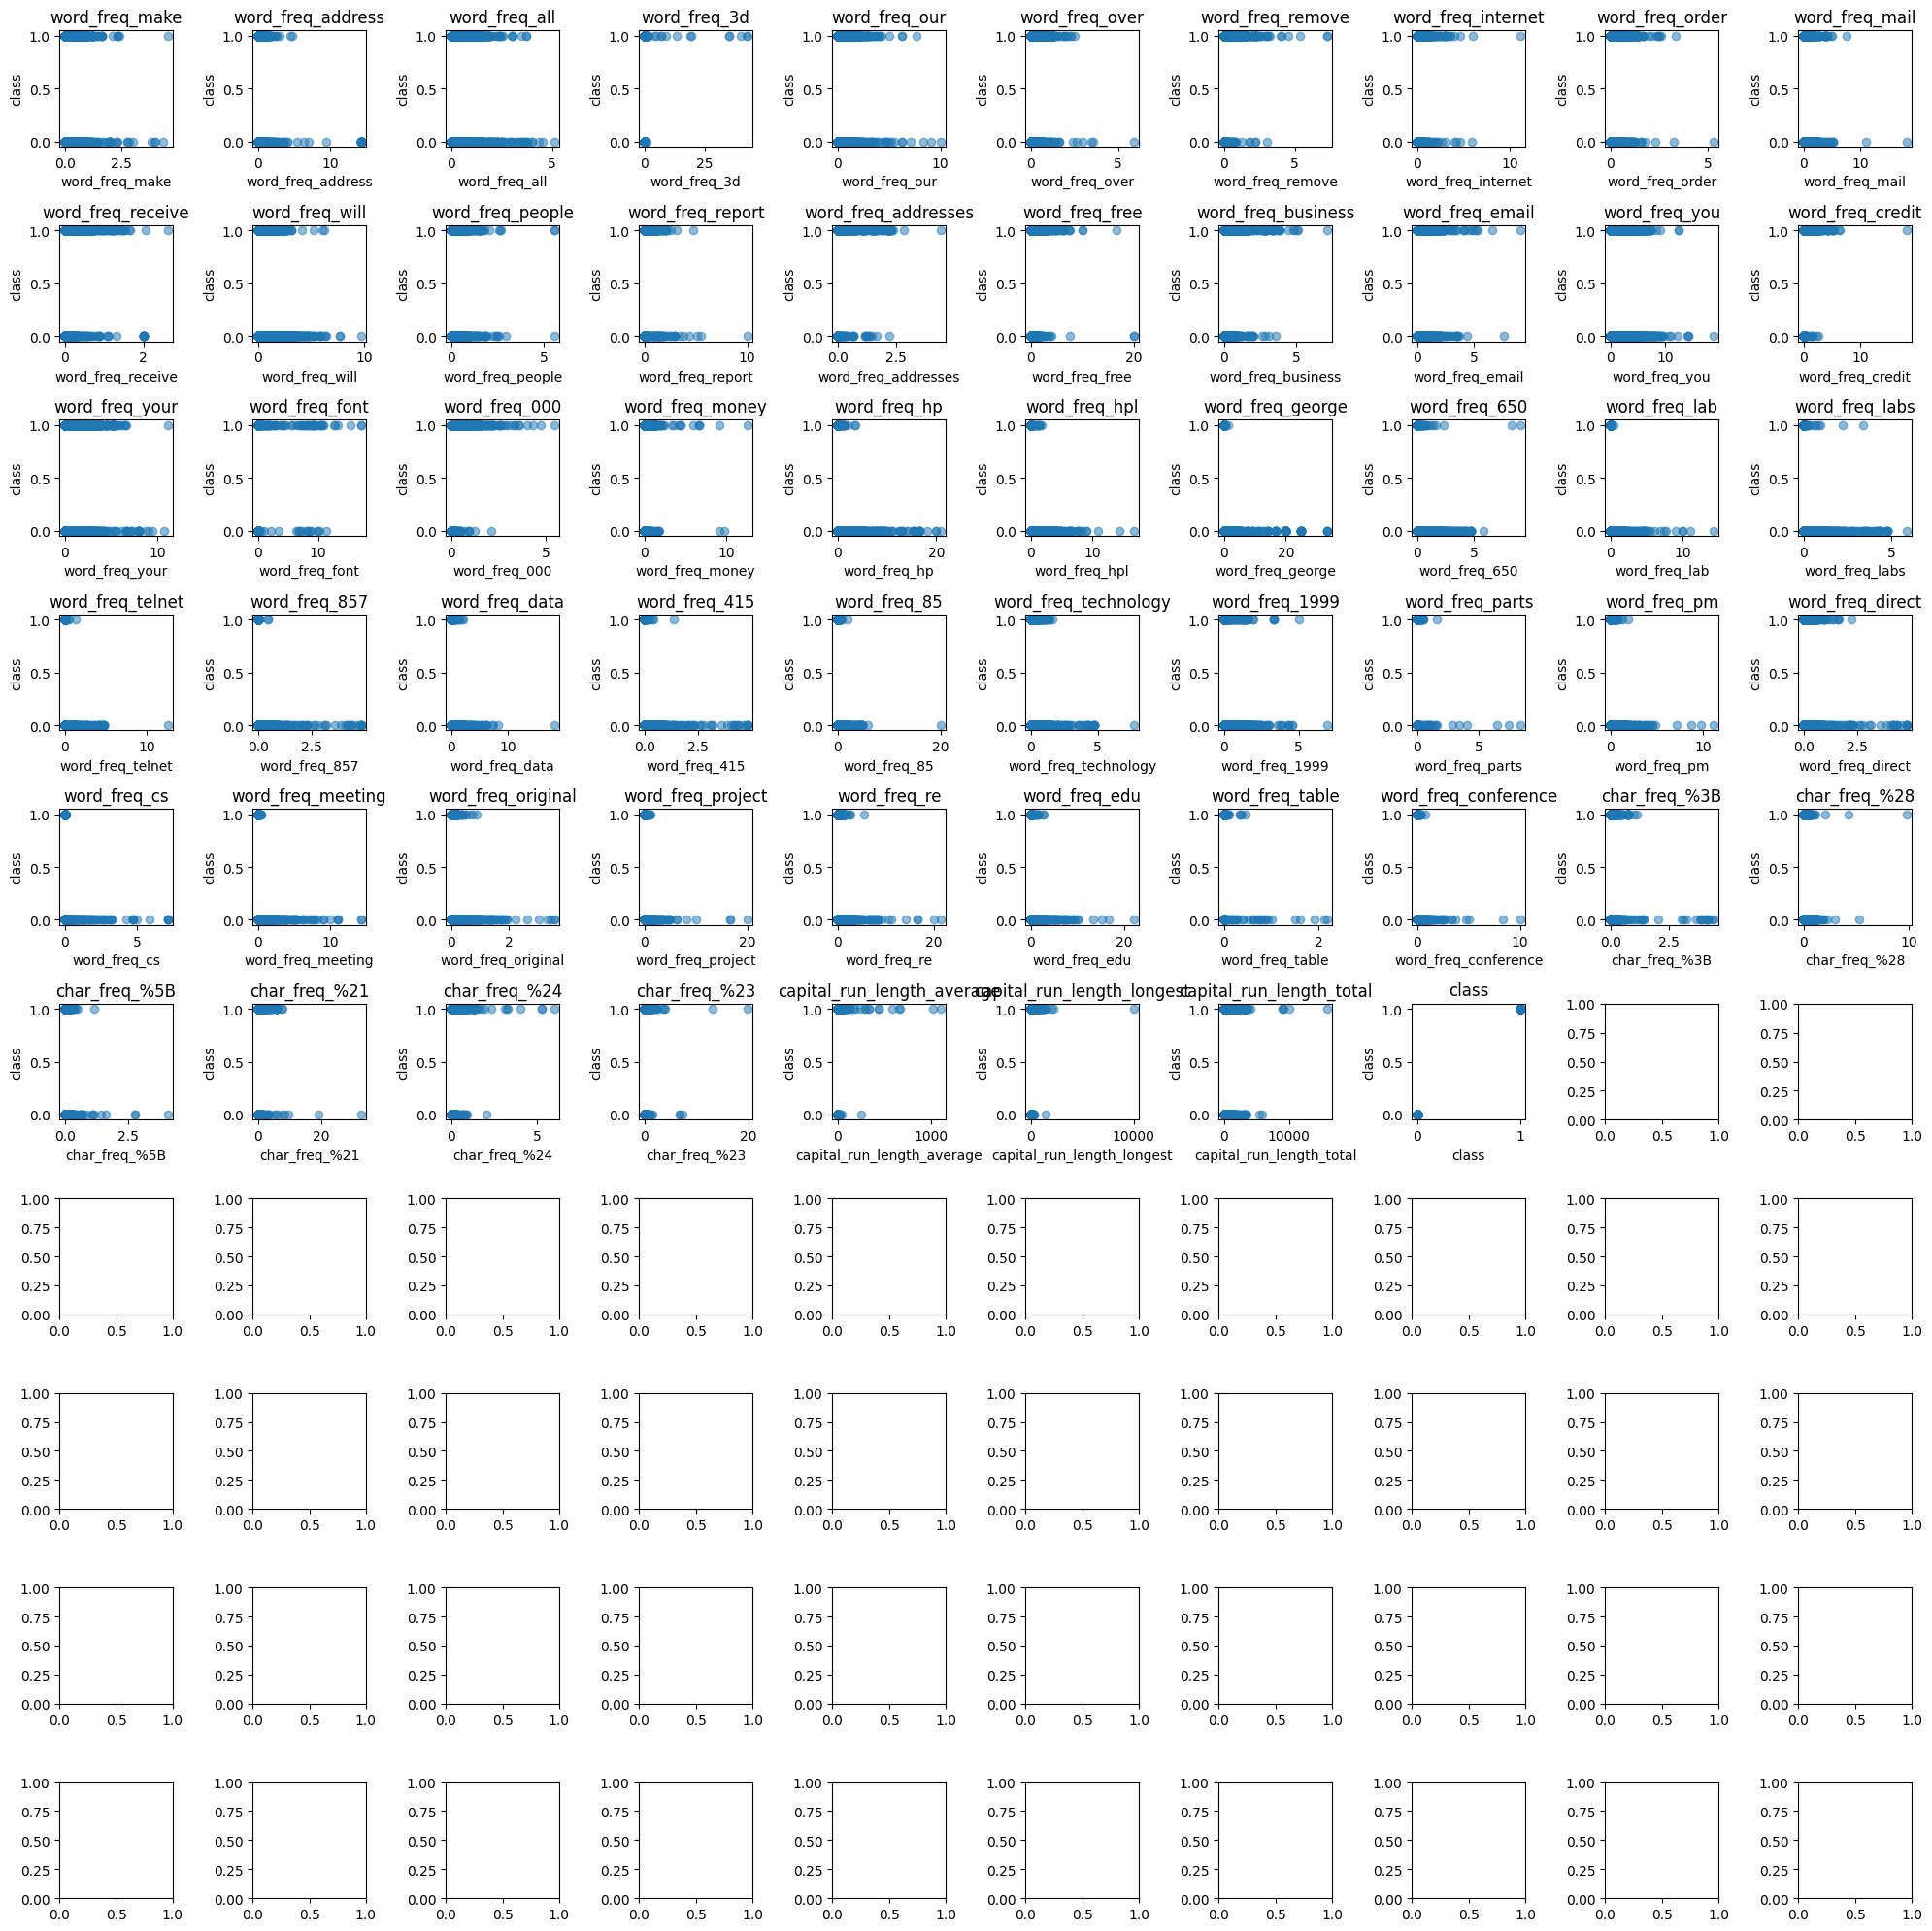

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)
scatter_cols = df.columns[:100]
target_col = "class"
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(scatter_cols):
    axes[i].scatter(df[col], df[target_col], alpha=0.5)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
plt.tight_layout()
plt.show()


histogram

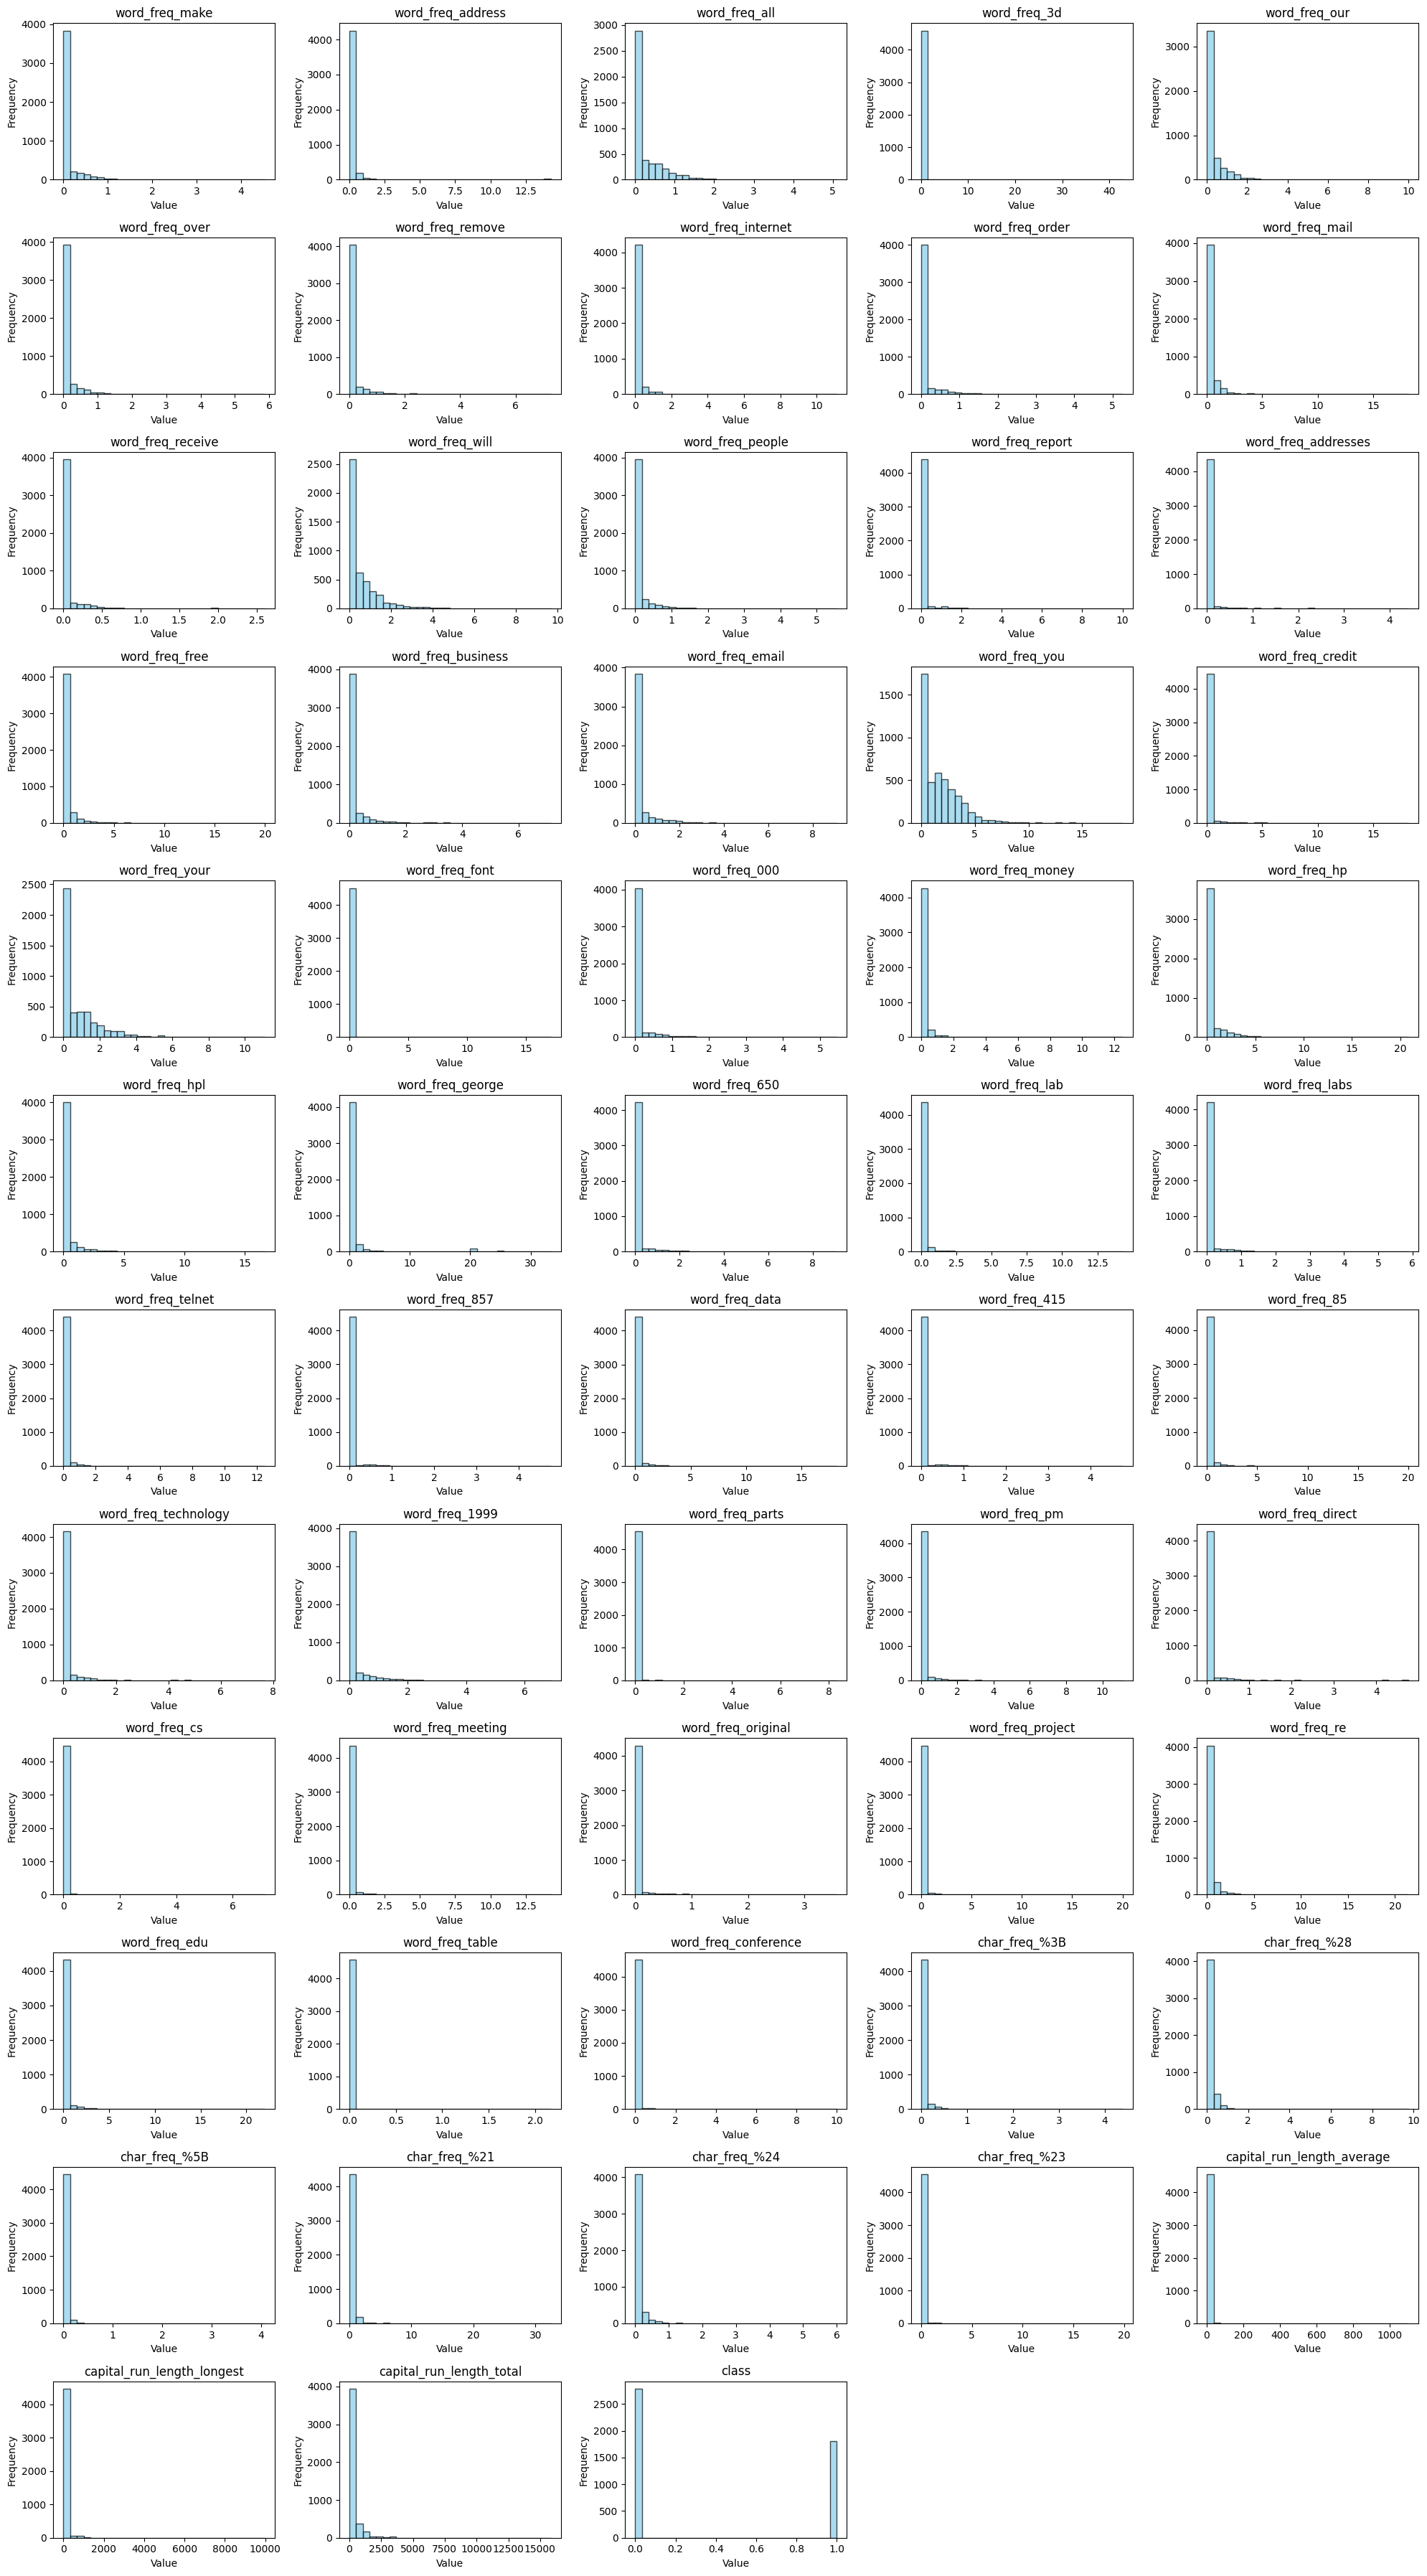

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)
num_cols = df.shape[1]
rows = num_cols // 5 + (num_cols % 5 > 0)

fig, axes = plt.subplots(rows, 5, figsize=(20, rows * 3))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


feature engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)

df.fillna(df.median(), inplace=True)


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

minmax_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(minmax_scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)


df_transformed = df_cleaned.copy()
for col in df_cleaned.columns:
    if df_cleaned[col].min() >= 0:
        df_transformed[col + "_log"] = np.log1p(df_cleaned[col])


df_transformed["word_freq_make_x_word_freq_address"] = df_cleaned["word_freq_make"] * df_cleaned["word_freq_address"]


selector = VarianceThreshold(threshold=0.01)
df_selected = pd.DataFrame(selector.fit_transform(df_cleaned), columns=df_cleaned.columns[selector.get_support()])


corr_matrix = df_selected.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated_features = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.85)]
df_selected.drop(columns=highly_correlated_features, inplace=True)

print("Final Processed Dataset Shape:", df_selected.shape)
df_selected.head()


Final Processed Dataset Shape: (177, 8)


,word_freq_our,word_freq_will,word_freq_you,word_freq_your,char_freq_%21,capital_run_length_average,capital_run_length_longest,class
0,0.94,0.00,1.88,2.83,0.428,4.652,31.0,1.0
1,0.00,0.00,1.29,0.64,0.000,1.103,3.0,1.0
2,0.00,0.00,1.29,0.64,0.000,1.103,3.0,1.0
3,0.00,1.81,0.00,1.81,0.309,1.333,11.0,1.0
4,0.00,0.00,0.00,0.00,0.000,1.266,4.0,1.0


data splitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)


print("Columns in dataset:", df.columns.tolist())


target_column = "class"


if target_column not in df.columns:
    raise KeyError(f"Target column '{target_column}' not found in dataset. Please check column names.")

X = df.drop(columns=[target_column], errors='ignore')
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Columns in dataset: ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_fre

linear regression

Columns in dataset: ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_fre

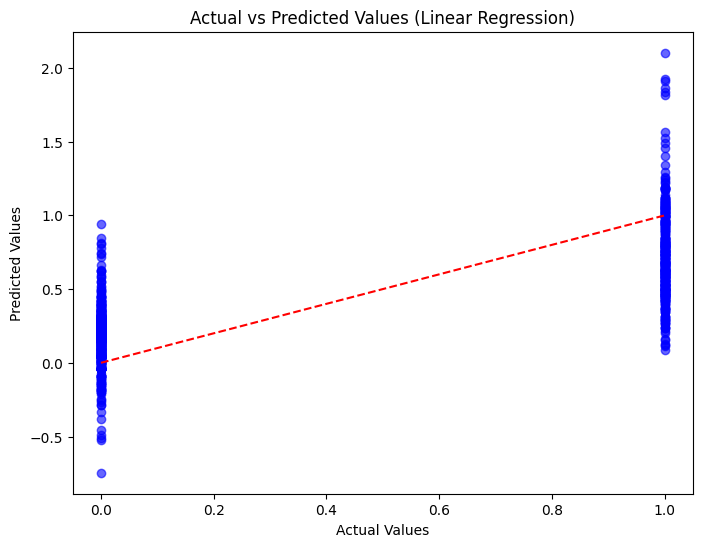

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)

print("Columns in dataset:", df.columns.tolist())


target_column = "class"

if target_column not in df.columns:
    raise KeyError(f"Target column '{target_column}' not found in dataset. Check column names!")


X = df.drop(columns=[target_column])
y = df[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.show()


svm-support vector machine

Columns in dataset: ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_fre

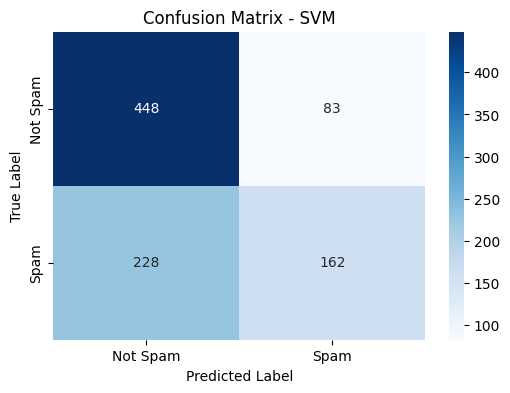

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)


print("Columns in dataset:", df.columns.tolist())


target_column = "class"

if target_column not in df.columns:
    raise KeyError(f"Target column '{target_column}' not found in dataset. Check column names!")
X = df.drop(columns=[target_column])
y = df[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()


decision tree

Columns in dataset: ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_fre

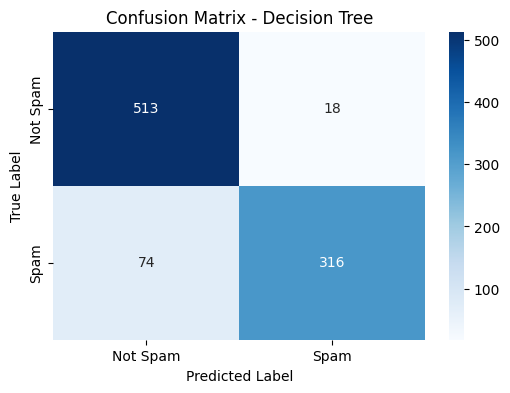

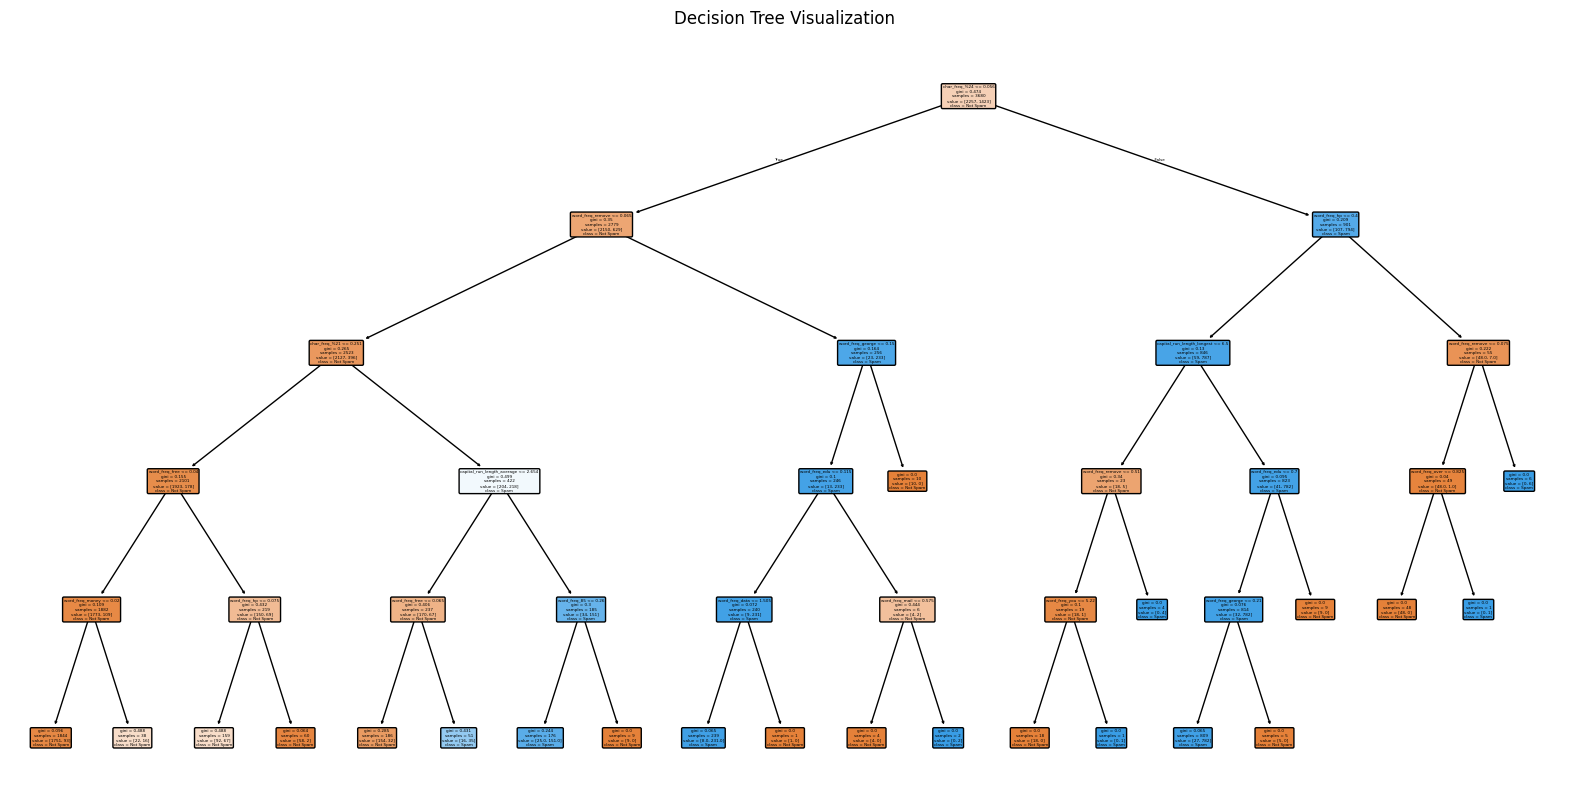

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)


print("Columns in dataset:", df.columns.tolist())

target_column = "class"

if target_column not in df.columns:
    raise KeyError(f"Target column '{target_column}' not found in dataset. Check column names!")


X = df.drop(columns=[target_column])
y = df[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

l
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["Not Spam", "Spam"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


random forest

Columns in dataset: ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_fre

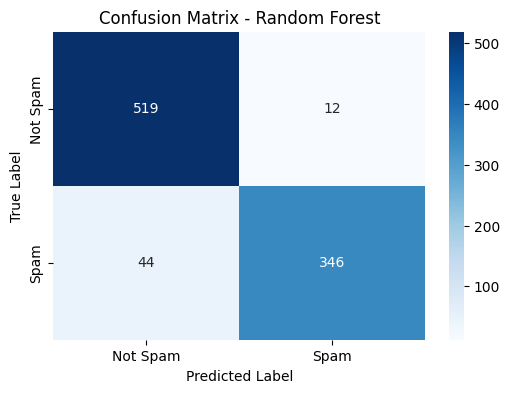

<ipython-input-24-f099b108369f>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:20], y=feature_importances.index[:20], palette="viridis")


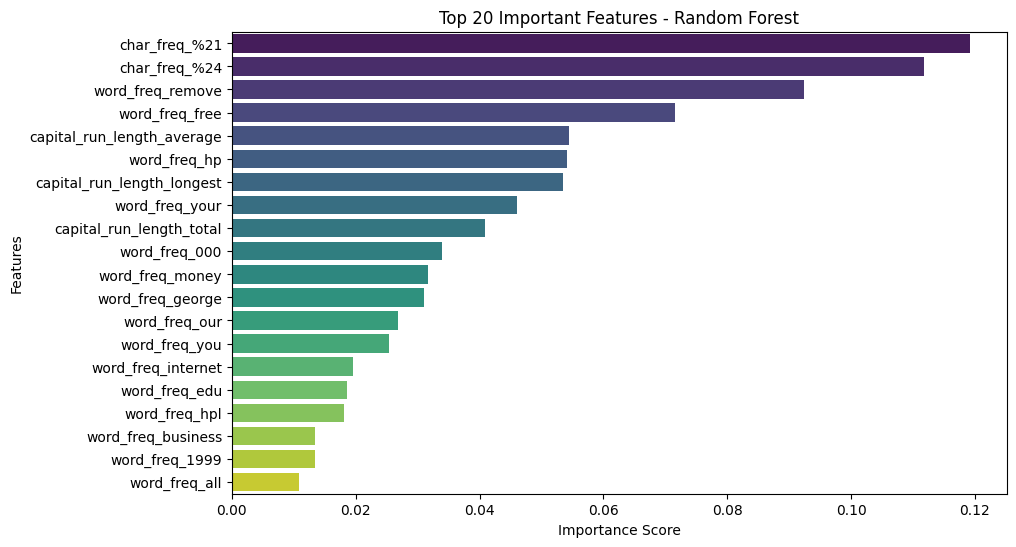

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)


print("Columns in dataset:", df.columns.tolist())


target_column = "class"


if target_column not in df.columns:
    raise KeyError(f"Target column '{target_column}' not found in dataset. Check column names!")


X = df.drop(columns=[target_column])
y = df[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:20], y=feature_importances.index[:20], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Important Features - Random Forest")
plt.show()


gradiet boosting

Columns in dataset: ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_fre

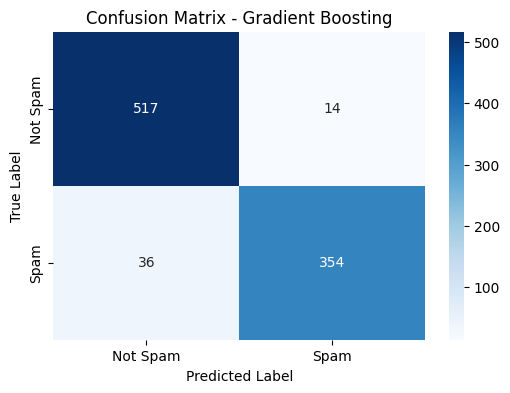

<ipython-input-25-cadefcd5121b>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:20], y=feature_importances.index[:20], palette="coolwarm")


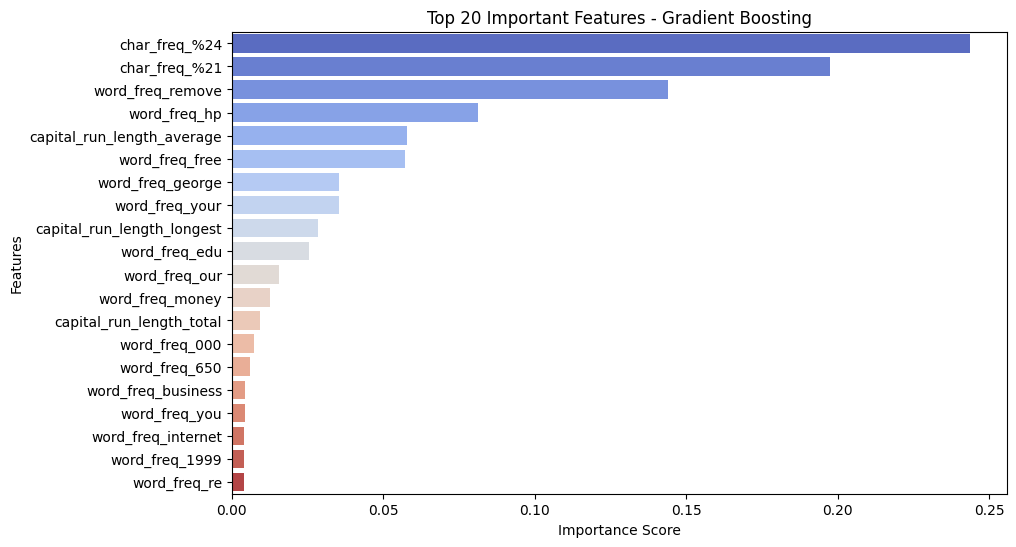

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)

print("Columns in dataset:", df.columns.tolist())


target_column = "class"

if target_column not in df.columns:
    raise KeyError(f"Target column '{target_column}' not found in dataset. Check column names!")


X = df.drop(columns=[target_column])
y = df[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)


y_pred = gb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:20], y=feature_importances.index[:20], palette="coolwarm")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Important Features - Gradient Boosting")
plt.show()


skewness

Skewness of Each Feature:
 word_freq_make                 5.675639
word_freq_address             10.086811
word_freq_all                  3.009249
word_freq_3d                  26.227744
word_freq_our                  4.747126
word_freq_over                 5.956953
word_freq_remove               6.765580
word_freq_internet             9.724848
word_freq_order                5.226067
word_freq_mail                 8.487810
word_freq_receive              5.510250
word_freq_will                 2.867354
word_freq_people               6.955548
word_freq_report              11.754645
word_freq_addresses            6.971041
word_freq_free                10.763594
word_freq_business             5.688642
word_freq_email                5.413754
word_freq_you                  1.591674
word_freq_credit              14.602587
word_freq_your                 2.435527
word_freq_font                 9.975441
word_freq_000                  5.713775
word_freq_money               14.687028
word_freq_hp 

<ipython-input-26-dee9fd8e9692>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.index, y=skewness.values, palette="coolwarm")


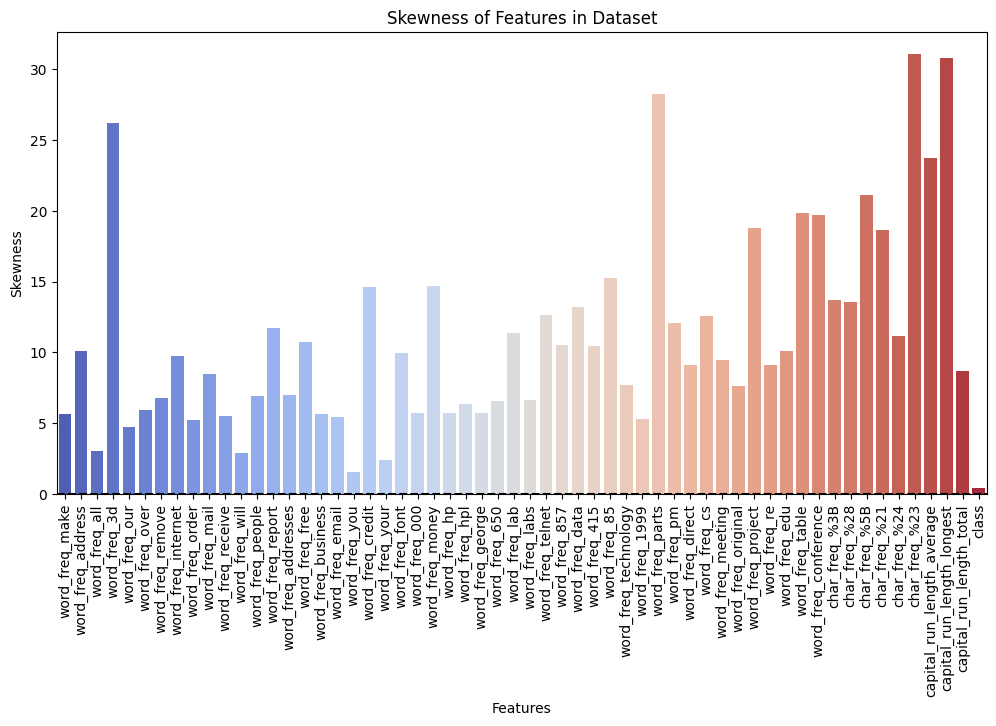

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)


skewness = df.skew()

print("Skewness of Each Feature:\n", skewness)


plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Skewness")
plt.title("Skewness of Features in Dataset")
plt.axhline(y=0, color="black", linestyle="--")
plt.show()


kurtosis

Kurtosis of Each Feature:
 word_freq_make                  49.305064
word_freq_address              105.647472
word_freq_all                   13.308743
word_freq_3d                   726.451538
word_freq_our                   37.941169
word_freq_over                  68.445258
word_freq_remove                75.413439
word_freq_internet             169.162876
word_freq_order                 46.940256
word_freq_mail                 161.214641
word_freq_receive               39.650945
word_freq_will                  12.550747
word_freq_people                84.941822
word_freq_report               229.201271
word_freq_addresses             57.727676
word_freq_free                 196.424975
word_freq_business              45.673775
word_freq_email                 47.961674
word_freq_you                    5.257394
word_freq_credit               383.001882
word_freq_your                   9.009506
word_freq_font                 109.142325
word_freq_000                   46.807860
word_fr

<ipython-input-27-96a06dae9646>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values, palette="coolwarm")


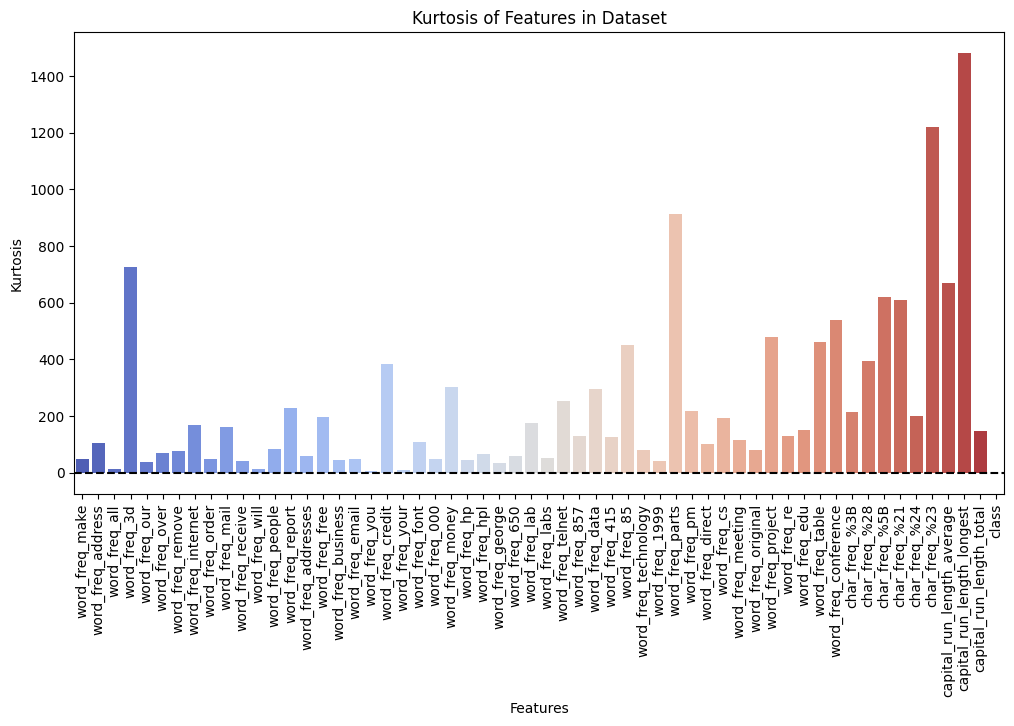

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis


file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)


kurtosis_values = df.kurtosis()


print("Kurtosis of Each Feature:\n", kurtosis_values)


plt.figure(figsize=(12, 6))
sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Kurtosis")
plt.title("Kurtosis of Features in Dataset")
plt.axhline(y=0, color="black", linestyle="--")
plt.show()


model training

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)


target_column = 'class'
X = df.drop(columns=[target_column])
y = df[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9555

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



Model Evaluation

✅ Model Accuracy: 0.9555

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



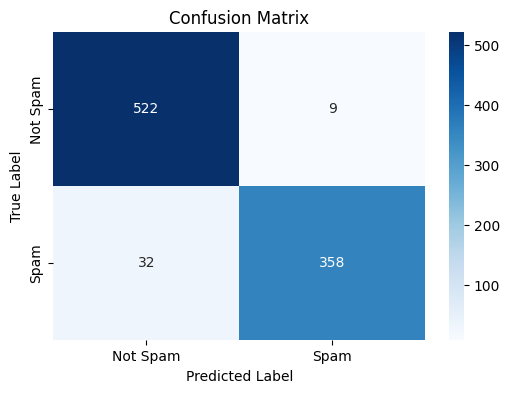

✅ ROC-AUC Score: 0.9851


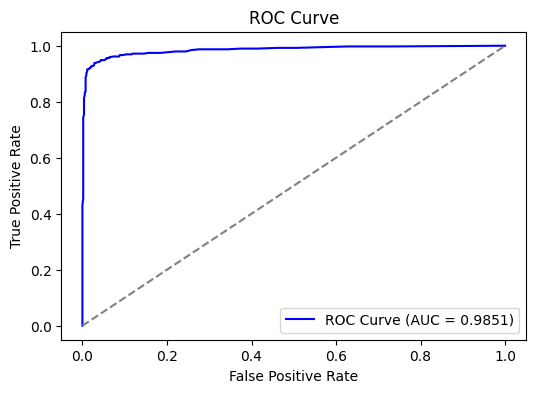

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


file_path = "/content/daup_csv.csv"
df = pd.read_csv(file_path)

target_column = 'class'
X = df.drop(columns=[target_column])
y = df[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.4f}")

print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
